In [1]:
import pandas as pd

df = pd.read_csv('shopping-data.csv')


X = df.drop(columns=["CustomerID"])

X.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


In [4]:
from sklearn.preprocessing import MinMaxScaler

data_scaler = MinMaxScaler(feature_range=(1,99))

data_scaler.fit(X)

TX = data_scaler.transform(X)
#print(TX)

X['Income'] = TX[:,0]

X['Score'] = TX[:,1]
X

,Annual Income (k$),Spending Score (1-100),Income,Score
0,15,39,1.000000,39.0
1,15,81,1.000000,81.0
2,16,6,1.803279,6.0
3,16,77,1.803279,77.0
4,17,40,2.606557,40.0
...,...,...,...,...
195,120,79,85.344262,79.0
196,126,28,90.163934,28.0
197,126,74,90.163934,74.0
198,137,18,99.000000,18.0


In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z1 = linkage(X, method='single', metric='euclidean')
Z2 = linkage(X, method='complete', metric='euclidean')
Z3 = linkage(X, method='average', metric='euclidean')
Z4 = linkage(X, method='ward', metric='euclidean')

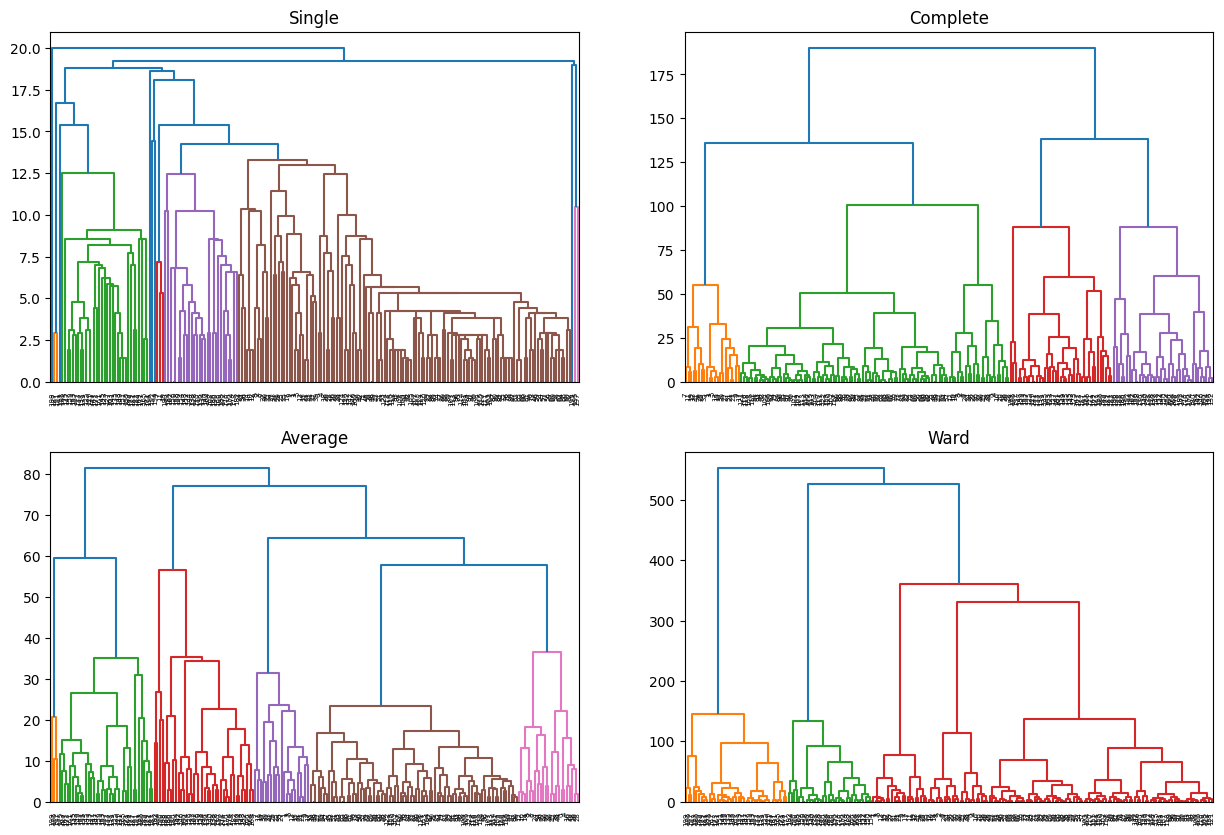

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

plt.subplot(2,2,1), dendrogram(Z1), plt.title('Single')
plt.subplot(2,2,2), dendrogram(Z2), plt.title('Complete')
plt.subplot(2,2,3), dendrogram(Z3), plt.title('Average')
plt.subplot(2,2,4), dendrogram(Z4), plt.title('Ward')

plt.show()

In [7]:
from sklearn.cluster import AgglomerativeClustering

Z1 = AgglomerativeClustering(n_clusters=5, linkage='ward')

Z1.fit_predict(X)

print(Z1.labels_)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 1 0 2 0 1 0
 2 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


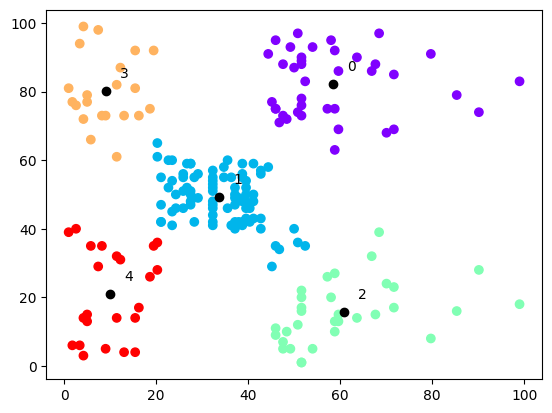

In [10]:
import numpy as np
import matplotlib.pyplot as plt

X1 = X["Income"]
X2 = X["Score"]

plt.scatter(X1, X2, c=Z1.labels_, cmap='rainbow')

# حساب مركز كل مجموعة لإضافة نقطة ورقم المجموعة في المركز
unique_labels = np.unique(Z1.labels_)
centroids = []
for label in unique_labels:
    centroid = np.mean(np.array([X1[Z1.labels_ == label], X2[Z1.labels_ == label]]).T, axis=0)
    centroids.append(centroid)

# Plot cluster centers
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], color='black')
    plt.annotate(
        i,
        xy=centroid,
        textcoords='offset points',
        xytext=(10, 10)
    )

plt.show()

In [12]:
cluster_map = pd.DataFrame()

cluster_map['CustomerID'] = df['CustomerID']

cluster_map['cluster'] = Z1.labels_

cluster_map[cluster_map.cluster == 1]

,CustomerID,cluster
43,44,1
45,46,1
46,47,1
47,48,1
48,49,1
...,...,...
126,127,1
132,133,1
142,143,1
146,147,1
